In [274]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

#### Using OLS with 'FundsPerStudent_13' as the dependent variable

In [275]:
# Load the data
df = pd.read_csv('cleaned_dataframe.csv')

# Add the 'FundsPerStudent_13' by calculating awards_13/recipients_13
df['FundsPerStudent_13'] = df['awards_13'] / df['recipients_13']

# Define the independent variables
X = df.drop('FundsPerStudent_13', axis=1)
X['const'] = 1

# Drop irrelevant columns (non-numeric data, pell grant data, data from 2000-2002, region codes, etc.)
X = X.select_dtypes(include=[np.number])
X = X.drop(['recipients_00', 'awards_00', 'recipients_01', 'awards_01',
           'recipients_02', 'awards_02', 'recipients_03', 'awards_03',
           'recipients_04', 'awards_04', 'recipients_05', 'awards_05',
           'recipients_06', 'awards_06', 'recipients_07', 'awards_07',
           'recipients_08', 'awards_08', 'recipients_09', 'awards_09',
           'recipients_10', 'awards_10', 'recipients_11', 'awards_11',
           'recipients_12', 'awards_12', 'recipients_13', 'awards_13',
           'recipients_14', 'awards_14', 'recipients_15', 'awards_15'], axis=1)
X = X.drop(['super_opeid','region','fips','cz','cfips','zip','type','multi',
           'exp_instr_pc_2000','flagship','ipeds_enrollment_2000','sticker_price_2000',
           'grad_rate_150_p_2002','avgfacsal_2001','sat_avg_2001','exp_instr_2000',
            'iclevel','tier'], axis=1)

# Dependent variable to be used in the model
y = df['FundsPerStudent_13']

In [276]:
result = sm.OLS(y, X, missing='drop').fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     FundsPerStudent_13   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     89.49
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:08:32   Log-Likelihood:                -16708.
No. Observations:                2367   AIC:                         3.349e+04
Df Residuals:                    2331   BIC:                         3.369e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
par_medi

In [277]:
# Rescale each feature by dividing each entry by the column mean (this reduces condition number w/o changing OLS stats)
sample_X = X
sample_X /= sample_X.mean(axis=0)
result = sm.OLS(y, sample_X, missing='drop').fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     FundsPerStudent_13   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     89.49
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:08:32   Log-Likelihood:                -16708.
No. Observations:                2367   AIC:                         3.349e+04
Df Residuals:                    2331   BIC:                         3.369e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
par_medi

In [278]:
# Iteratively drop the columns that have high p-values (>0.05) from the model
sample_X = sample_X.drop(['pct_stem_2000','exp_instr_2012','scorecard_netprice_2013','count',
                         'kq5_cond_parq1','par_median','alien_share_fall_2000','trend_parq1',
                         'pct_multidisci_2000','exp_instr_pc_2013','pct_publicsocial_2000',
                         'hisp_share_fall_2000'], axis=1)
result = sm.OLS(y, sample_X, missing='drop').fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     FundsPerStudent_13   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     136.1
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:08:33   Log-Likelihood:                -16711.
No. Observations:                2367   AIC:                         3.347e+04
Df Residuals:                    2343   BIC:                         3.361e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
k_median

#### Save the output of the OLS summary as "q1b_OLS.png"

In [109]:
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(result.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig('q1b_OLS.png')

#### Plot a few interesting features against "FundsPerStudent_13" with their best fit line

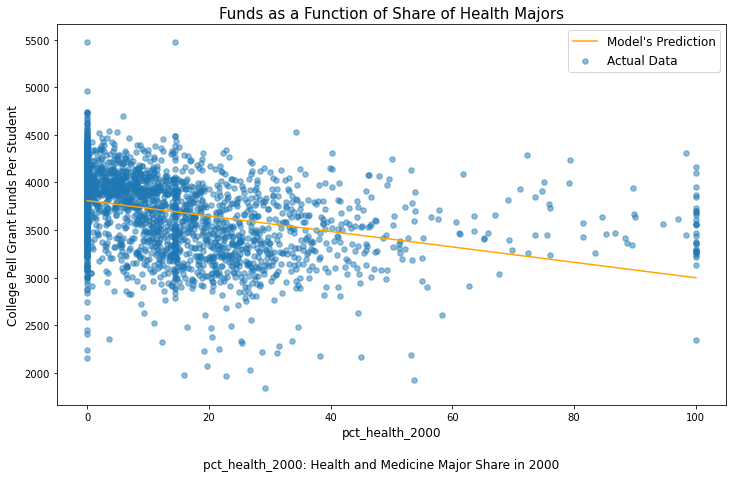

In [411]:
feature = pd.DataFrame(df['pct_health_2000'])
feature['const'] = 1
#feature.drop(feature.tail(1).index,inplace=True)
result = sm.OLS(y, feature, missing='drop').fit()
domain = np.linspace(0,100,2463)
plt.scatter(feature['pct_health_2000'], y, label='Actual Data', s=30, alpha=0.5)
plt.plot(domain, result.params[1] + domain*result.params[0], color='orange', label='Model\'s Prediction')
plt.xlabel('pct_health_2000', fontsize=12)
plt.ylabel('College Pell Grant Funds Per Student', fontsize=12)
plt.legend(fontsize=12)
plt.title('Funds as a Function of Share of Health Majors', fontsize=15)

# Add description
plt.figtext(0.5,0,"pct_health_2000: Health and Medicine Major Share in 2000", horizontalalignment='center',
           fontsize=12, fontweight='light')
plt.savefig('q1b_health.jpg',bbox_inches='tight', dpi=150)
plt.show()


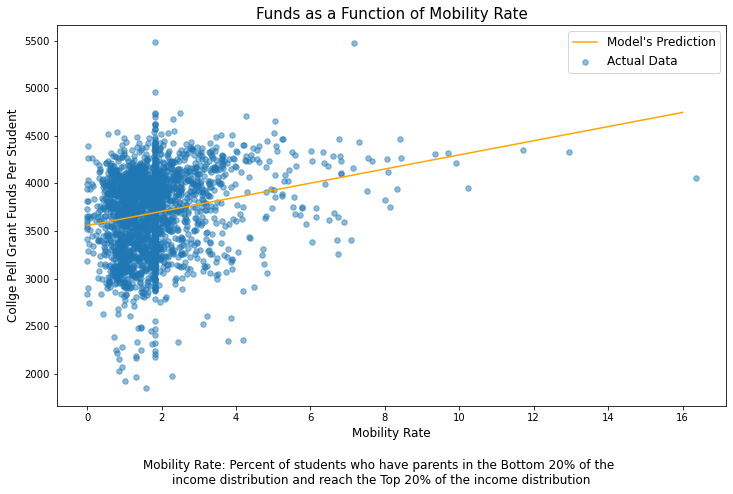

In [412]:
feature = pd.DataFrame(df['mr_kq5_pq1'])
feature['const'] = 1
#feature.drop(feature.tail(1).index,inplace=True)
result = sm.OLS(y, feature, missing='drop').fit()
domain = np.linspace(0,16,2463)
plt.scatter(feature['mr_kq5_pq1'], y, label='Actual Data', s=30, alpha=0.5)
plt.plot(domain, result.params[1] + domain*result.params[0], color='orange', label='Model\'s Prediction')
plt.xlabel('Mobility Rate', fontsize=12)
plt.ylabel('Collge Pell Grant Funds Per Student', fontsize=12)
plt.legend(fontsize=12)
plt.title('Funds as a Function of Mobility Rate', fontsize=15)

# Add description
plt.figtext(0.5,-0.03,"Mobility Rate: Percent of students who have parents in the Bottom 20% of the \n"
"income distribution and reach the Top 20% of the income distribution", horizontalalignment='center',
            fontsize=12, fontweight='light')

plt.savefig('q1b_mobility.jpg', bbox_inches='tight', dpi=150)
plt.show()

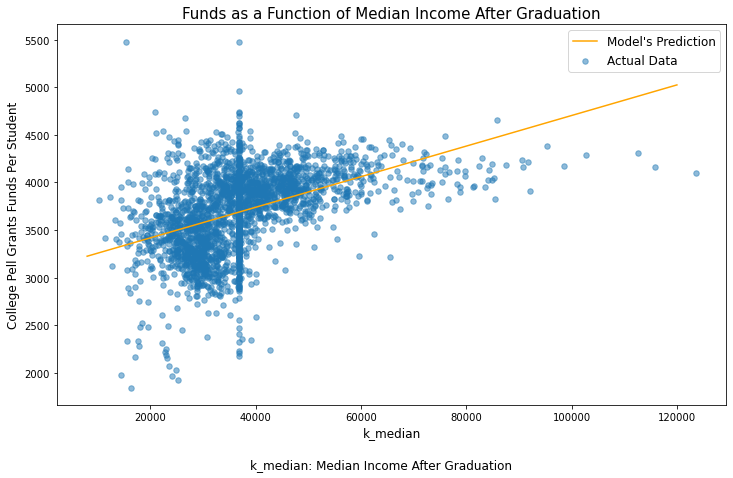

In [413]:
feature = pd.DataFrame(df['k_median'])
feature['const'] = 1
#feature.drop(feature.tail(1).index,inplace=True)
result = sm.OLS(y, feature, missing='drop').fit()
domain = np.linspace(8000,120000,2463)
plt.scatter(feature['k_median'], y, label='Actual Data', s=30, alpha=0.5)
plt.plot(domain, result.params[1] + domain*result.params[0], color='orange', label='Model\'s Prediction')
plt.xlabel('k_median', fontsize=12)
plt.ylabel('College Pell Grants Funds Per Student', fontsize=12)
plt.legend(fontsize=12)
plt.title('Funds as a Function of Median Income After Graduation', fontsize=15)

# Add description
plt.figtext(0.5,0,"k_median: Median Income After Graduation", fontsize=12, horizontalalignment='center', fontweight='light')

plt.savefig('q1b_k_median.jpg', bbox_inches='tight', dpi=150)
plt.show()